# **Methodology**

## **1. Data Preparation**

### **Problem Statement**

Menurut beberapa sumber terkenal, diperkirakan 10.000 transaksi terjadi melalui kartu kredit setiap detik di seluruh dunia. Karena frekuensi transaksi yang begitu tinggi, kartu kredit menjadi sasaran utama penipuan.

Setiap tahun, miliaran dolar hilang secara langsung karena penipuan kartu kredit. Kasus penipuan terjadi dalam kondisi yang berbeda, misalnya, transaksi di tempat penjualan (POS) atau transaksi yang dilakukan secara online atau melalui telepon, misalnya kasus kartu tidak ada (CNP) atau transaksi dengan kartu yang hilang dan dicuri. Dengan cara ini, penipuan kartu kredit pada tahun 2015 saja berjumlah 21,84 miliar dolar, dengan penerbit menanggung biaya 15,72 miliar dolar.

Banyak survei menunjukkan bahwa peningkatan ketergantungan pada kartu kredit untuk melakukan transaksi keuangan disertai dengan peningkatan tingkat penipuan.

Peningkatan penipuan kartu kredit baru-baru ini secara langsung memukul sektor keuangan dengan keras. Kerugian akibat penipuan kartu kredit terutama berdampak pada pedagang karena mereka menanggung semua biaya, termasuk biaya dari penerbit kartu mereka, biaya administrasi dan biaya lainnya. Semua kerugian ditanggung oleh pedagang, yang menyebabkan kenaikan harga barang dan penurunan diskon. Oleh karena itu, mengurangi kerugian ini sangat penting. Diperlukan sistem deteksi fraud yang efektif untuk meminimalisir jumlah kasus fraud.

### **Objectives**

- Analisa ini akan berfokus mendeteksi hal apa yang paling berpengaruh dalam pencurian kartu kredit ini sehingga perusahaan jasa keuangan (Perbankan) dapat melakukan evaluasi terhadap tindak kriminal ini.


## **Metrics**
- 0 = Non-Fraud (Negative)
- 1 = Fraud (Positive)

- Error tipe 1: False Positive
- False Positive akan memberikan prediksi jumlah tidak terjadinya kasus kriminal pencurian kartu kredit namun pada realitanya terjadi kecurangan pencurian kartu kredit, hal ini jika dibiarkan maka akan menyebabkan semakin tinggi tingkat pencurian kartu kredit dan beresiko menyebabkan konsumen kehilangan kepercayaan pada perbankan.

- Error Tipe 2: False Negative
- False Negatif akan memberikan prediksi jumlah tindakan kasus kriminal pencurian kartu kredit namun pada realitanya tidak terjadi kecurangan pencurian kartu kredit, hal ini akan menyebabkan perusahaan sering mendapatkan komplain dari customer terkait laporan - laporan transaksi customer.

Berdasarkan konsekuensinya, maka sebisa mungkin model yang akan dibuat dapat membantu pihak perbankan dan customer dalam mengecilkan pencurian kartu kredit tanpa merugikan perbankan dari segi nama baik perbankan dan tanpa mengganggu transaksi konsumen sehingga penggunaan machine learning ini dapat membantu kedua pihak. Maka dari itu , nilai recall dan precision berdasarkan kelas positifnya perlu untuk di seimbangkan sehingga metric utama yang akan digunakan adalah `f-1 score`.

### **Analytical Approach**

- Dalam analisa ini akan dilakukan 3 tahapan :
  - 1. Tahapan pertama akan melakukan Exploratory Data Analyst untuk mendapatkan insight secara deskriptive
  - 2. Tahapan kedua akan melakukan visualisasi dari hasil data yang sudah di analisa
  - 3. Tahapan ketiga akan melakukan modeling machine learning sehingga diperoleh faktor apa yang memiliki pengaruh penyebab terjadinya tindakan kriminal pencurian kartu kredit sehingga perusahaan dapat menargetkan berapa total nasabah yang akan dicegah dari tindakan kecurangan pencurian kartu kredit ini.

### **Definisi Kolom**

| **Nama Kolom** | **Keterangan Kolom** |
| --- | --- |
|**Credit Card Fraud**||
|Distance From Home| The distance from home where the transaction happened|
|Distance From Last Transaction| The distance from last transaction happened|
|Ratio To Median Purchase Price| Ratio of purchased price transaction to median purchase price|
|Repeat Retailer|  Is the transaction happened from same retailer|
|Used Chip |  Is the transaction through chip (credit card)|
|Used Pin Number| Is the transaction happened by using PIN number|
|Online Order | Is the transaction an online order|
|Fraud | Is the transaction fraudulent|

In [130]:
# Library
import pandas as pd # Pandas Library 
import numpy as np # Numpy Library

# Visualization
import matplotlib.pyplot as plt # For Data Visualization
import seaborn as sns # For Data Visualization

# Feature Engineering
from sklearn.pipeline import Pipeline # to Create a Pipeline for Feature Engineering
from sklearn.impute import SimpleImputer # For Missing Value Handling
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder # to Handle Catogorical Features
from sklearn.compose import ColumnTransformer # to Transform Features
import category_encoders as ce # to encode category features
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, RandomizedSearchCV

# Model Selection
from sklearn.linear_model import LogisticRegression # Base Model for Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Base Model for Decision Tree 
from sklearn.model_selection import StratifiedKFold,train_test_split, cross_val_score, RandomizedSearchCV , GridSearchCV# Finding Best Hyperparameter with GridsearchCV
from sklearn.metrics import classification_report, confusion_matrix # to Display Classification Report and Confusion Matrix
from sklearn.neighbors import KNeighborsClassifier # Base Model for KNN
from sklearn.ensemble import RandomForestClassifier # Ensemble method using Random Forest
from xgboost import XGBClassifier # Ensemble method using XGBoost
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score # Evaluation Metric

# Imbalance Dataset
from imblearn.pipeline import Pipeline # to Create Pipeline for Imbalance Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE # Random Over Sample as Imblance Handling method
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, PowerTransformer, OneHotEncoder,MinMaxScaler

# Ignore Warning
import warnings 
warnings.simplefilter("ignore")

In [131]:
df = pd.read_csv('card_transdata.csv')
pd.options.display.max_columns=100
pd.options.display.max_rows=1000000
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [132]:
df.shape

(1000000, 8)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [134]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [135]:
df_statistik = df.describe(include='all')
df_statistik

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [136]:
df.duplicated().sum()

0

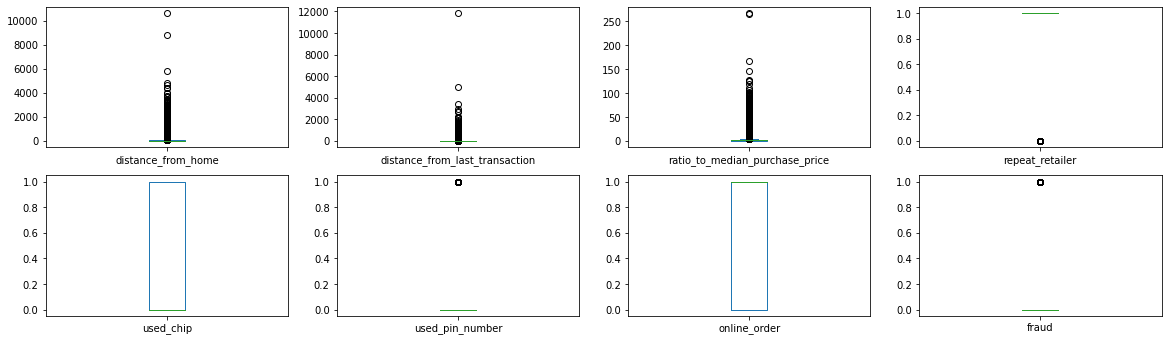

In [137]:
df.plot(kind='box', figsize=(20,15), subplots=True, layout=(5,4))
plt.show()

In [138]:
def distance_from_home_col(x):
    if x > 0 and x <=26:
        return 'Near Home'
    else :
        return 'Far From Home'

In [139]:
df['distance_from_home_category'] = df['distance_from_home']

In [140]:
df['distance_from_home_category'] = df['distance_from_home_category'].apply(distance_from_home_col)

In [141]:
def ratio_to_median_purchase_price_col(x):
    if x > 0 and x <=1:
        return 'Low Price'
    elif x > 1 and x <= 50:
        return 'Medium Price'
    else :
        return 'High Price'

In [142]:
df['ratio_to_median_purchase_price_category'] = df['ratio_to_median_purchase_price']

In [143]:
df['ratio_to_median_purchase_price_category'] = df['ratio_to_median_purchase_price_category'].apply(ratio_to_median_purchase_price_col)

In [144]:
total = float(len(df))

In [145]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home_category,ratio_to_median_purchase_price_category
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,Far From Home,Medium Price
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,Near Home,Medium Price
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,Near Home,Low Price
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,Near Home,Low Price
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,Far From Home,Medium Price


### Data Imbalance

In [146]:
pd.crosstab(index=df['fraud'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
fraud,,
0.0,0.91,0.00
1.0,0.00,0.09


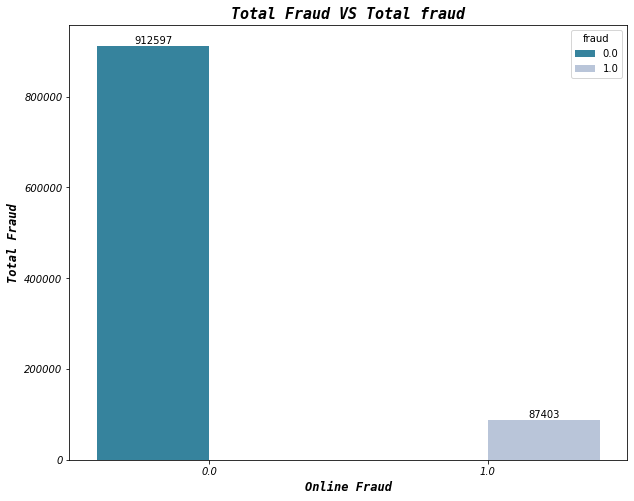

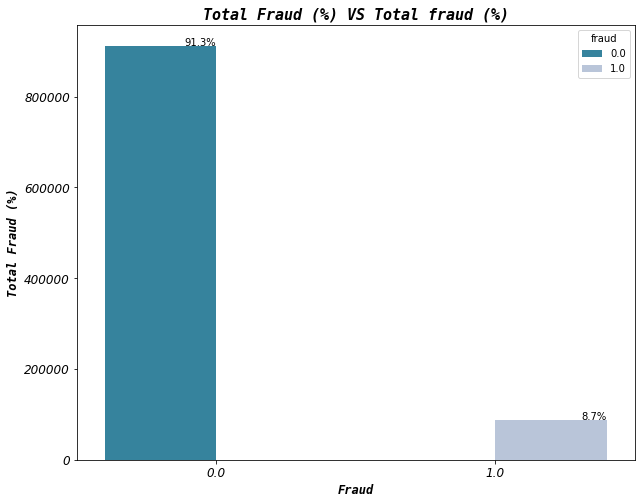

In [147]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='fraud', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Fraud VS Total fraud',size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Online Fraud', size=12, fontstyle='italic', family='monospace',weight=900)
plt.ylabel('Total Fraud', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="fraud", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Fraud (%) VS Total fraud (%)',size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Fraud', size=12, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Total transaksi yang terjadi kecurangan di perusahaan sebanyak 8,7%, lebih rendah dari pada transaksi yang tidak terjadi kecurangan di perusahaan.

#### **Distance From Home Category**

In [148]:
pd.crosstab(index=df['distance_from_home_category'],columns='count',normalize=True).round(2)

col_0,count
distance_from_home_category,
Far From Home,0.25
Near Home,0.75


In [149]:
pd.crosstab(index=df['distance_from_home_category'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
distance_from_home_category,,
Far From Home,0.21,0.04
Near Home,0.70,0.05


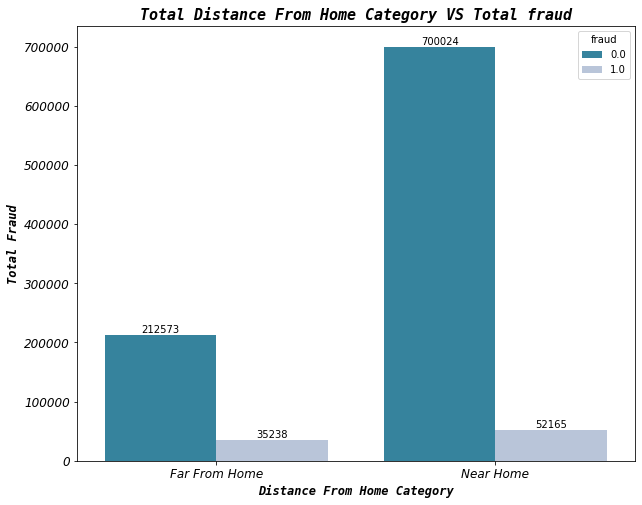

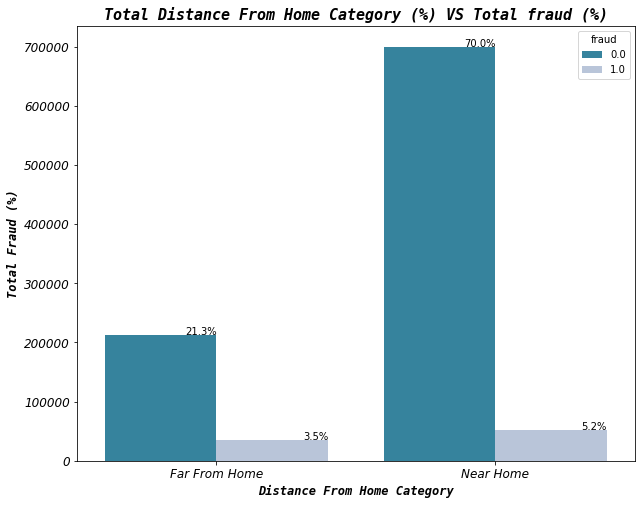

In [150]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='distance_from_home_category', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=12,fontstyle='italic')
plt.yticks(size=12,fontstyle='italic')
plt.title('Total Distance From Home Category VS Total fraud', size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Distance From Home Category', size=12, fontstyle='italic', family='monospace',weight=900)
plt.ylabel('Total Fraud', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="distance_from_home_category", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Distance From Home Category (%) VS Total fraud (%)', size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Distance From Home Category', size=12, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)',size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

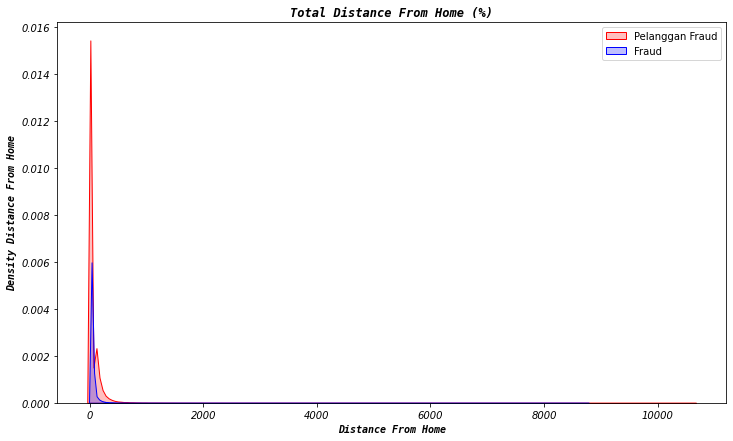

In [161]:
plt.figure(figsize=(12,7))
df_yes=df[df['fraud']==1]['distance_from_home'] 
df_no=df[df['fraud']==0]['distance_from_home'] 
sns.kdeplot(df_yes, label = 'Pelanggan Fraud', shade = True, color = 'r',fill=True)
sns.kdeplot(df_no, label = 'Fraud', shade = True, color = 'b', fill=True)
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Distance From Home (%)',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Distance From Home', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Distance From Home', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Transaksi kecurangna kartu kredit paling banyak terjadi dekat dari rumah yang jaraknya itu kurang dari 27 mil dari rumah dengan total persentase 5,2% kecurangan terjadi dan angka ini berbeda sedikit dari total persentase transaksi kecurangan yang terjadi jauh dari rumah 3,5%.

#### **Repeat Retailer**

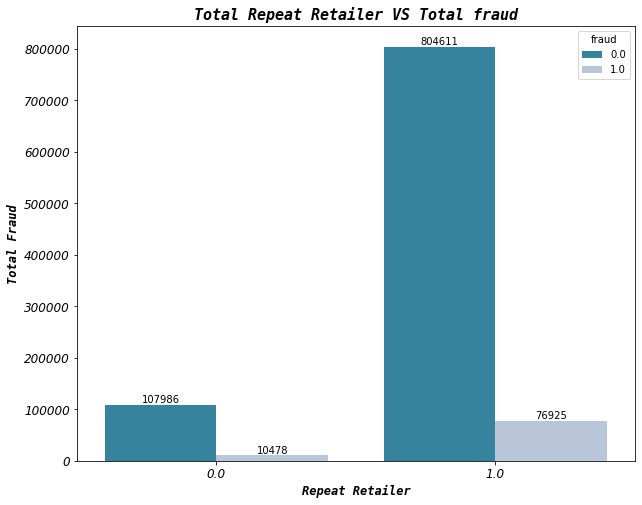

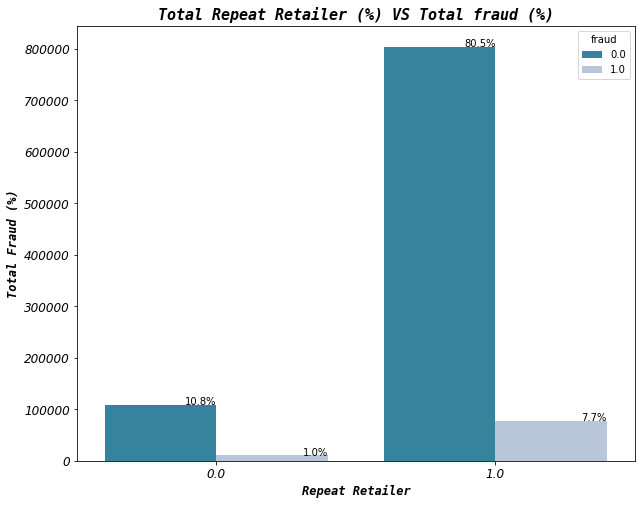

In [151]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='repeat_retailer', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=12,fontstyle='italic')
plt.yticks(size=12,fontstyle='italic')
plt.title('Total Repeat Retailer VS Total fraud', size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Repeat Retailer', size=12, fontstyle='italic', family='monospace',weight=900)
plt.ylabel('Total Fraud', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="repeat_retailer", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Repeat Retailer (%) VS Total fraud (%)', size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Repeat Retailer', size=12, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Transaksi kecurangan paling banyak terjadi pada transaksi dari pembelian pada toko yang sama sebanyak 76.925 transaksi kecurangan dengan total persentase 7.7%

In [152]:
pd.crosstab(index=df['used_chip'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
used_chip,,
0.0,0.58,0.06
1.0,0.33,0.02


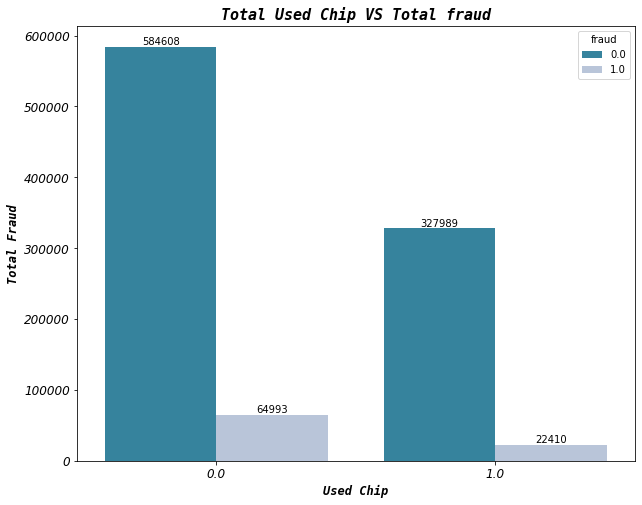

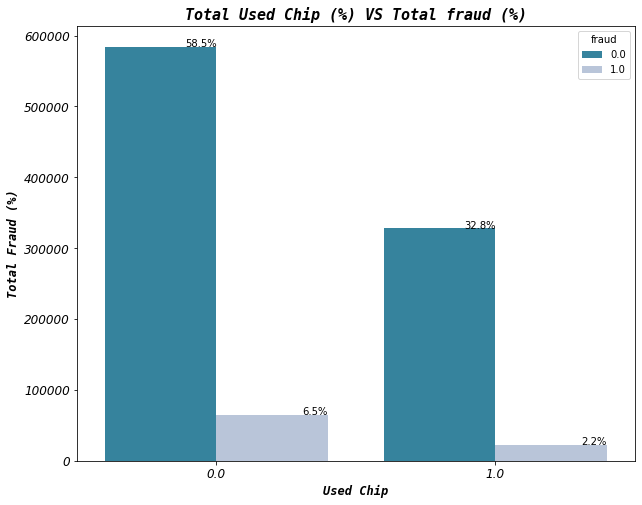

In [153]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='used_chip', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=12,fontstyle='italic')
plt.yticks(size=12,fontstyle='italic')
plt.title('Total Used Chip VS Total fraud', size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Used Chip', size=12, fontstyle='italic', family='monospace',weight=900)
plt.ylabel('Total Fraud', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="used_chip", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Used Chip (%) VS Total fraud (%)', size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Used Chip', size=12, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Total kartu kredit yang menggunakan chip sebanyak 35% dan yang tidak menggunakan chip sebanyak 65%, namun kecurangan paling banyak terjadi dari kartu kredit yang tidak menggunakan chip sebanyak 6.5% dari total keseluruhan kartu kredit yang tidak menggunakan chip, angka ini lebih tinggi dari pada kartu kredit yang menggunakan chip.

In [154]:
pd.crosstab(index=df['used_pin_number'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
used_pin_number,,
0.0,0.81,0.09
1.0,0.10,0.00


#### **Used Pin**

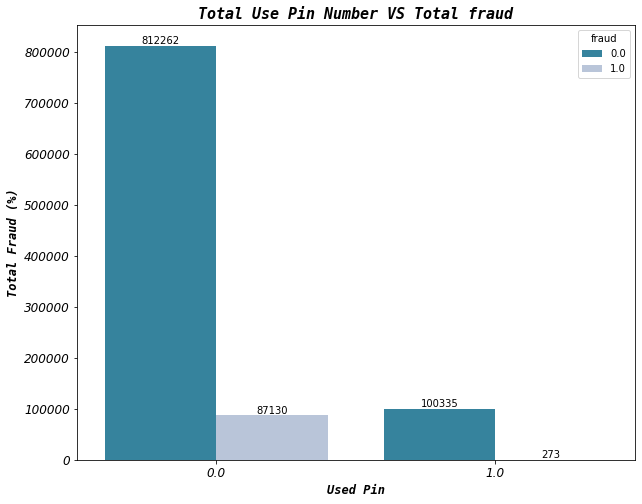

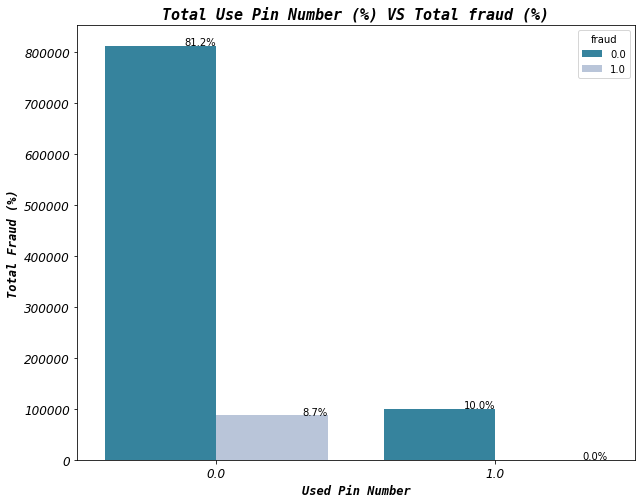

In [155]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='used_pin_number', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=12,fontstyle='italic')
plt.yticks(size=12,fontstyle='italic')
plt.title('Total Use Pin Number VS Total fraud', size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Used Pin', size=12, fontstyle='italic', family='monospace',weight=900)
plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="used_pin_number", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Use Pin Number (%) VS Total fraud (%)', size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Used Pin Number', fontstyle='italic', size=12, family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Kartu kredit yang menggunakan nomor pada chip sebanyak 10.1%, lebih rendah dari pada kartu kredit yang tidak menggunakan nomor pada chip sebanyak 89%, namun kecurangan pada kartu kredit paling banyak terjadi pada kartu kredit yang tidak memiliki nomor pada chip yaitu sebanyak 8.7% dan hal ini lebih tinggi dari pada kartu kredit yang menggunakan chip yaitu 0.0%

#### **Online Order**

In [156]:
pd.crosstab(index=df['online_order'],columns=df['fraud'],normalize=True).round(2)

fraud,0.0,1.0
online_order,,
0.0,0.34,0.00
1.0,0.57,0.08


#### **Online Order**

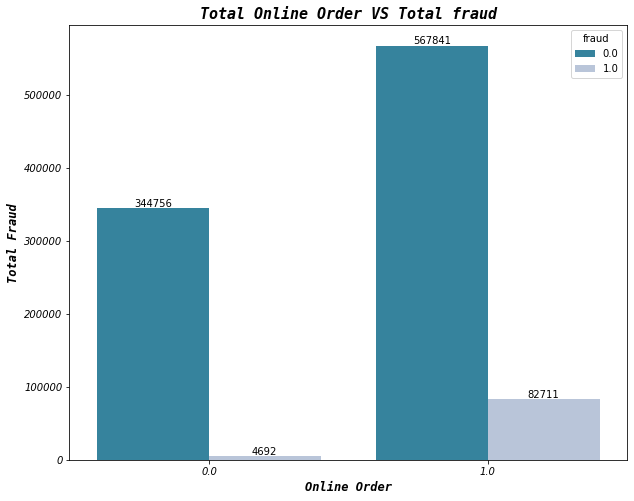

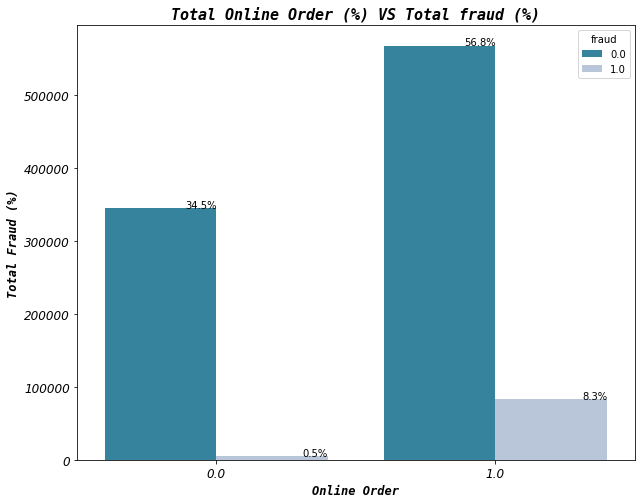

In [157]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='online_order', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Online Order VS Total fraud', size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Online Order', fontstyle='italic', size=12, family='monospace',weight=900)
plt.ylabel('Total Fraud', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="online_order", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Online Order (%) VS Total fraud (%)', size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Online Order', size=12, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Pembelian secara online menggunakan kartu kredit lebih banyak 65% dari pada pembelian tidak online sebanyak 35%, namun kasus kecurangan kartu kredit paling banyak terjadi dari pembelian secara online yaitu 8.3%, pembelian secara online dengan kartu kredit memiliki proporsi lebih tinggi dari pada pembelian menggunakan kartu kredit untuk pembelian offline.

#### **Ratio To Median Purchase Price Category**

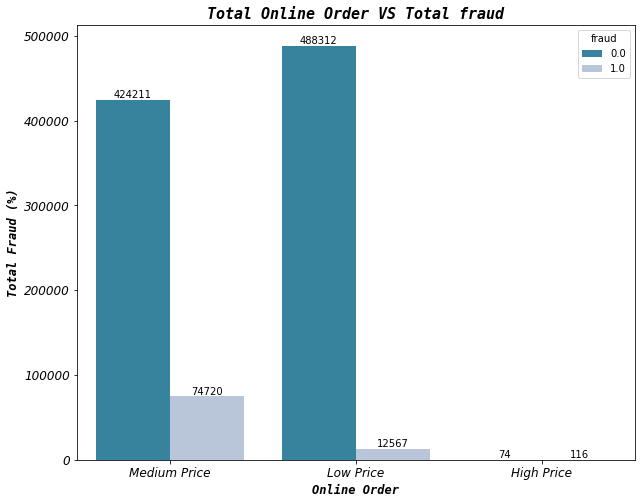

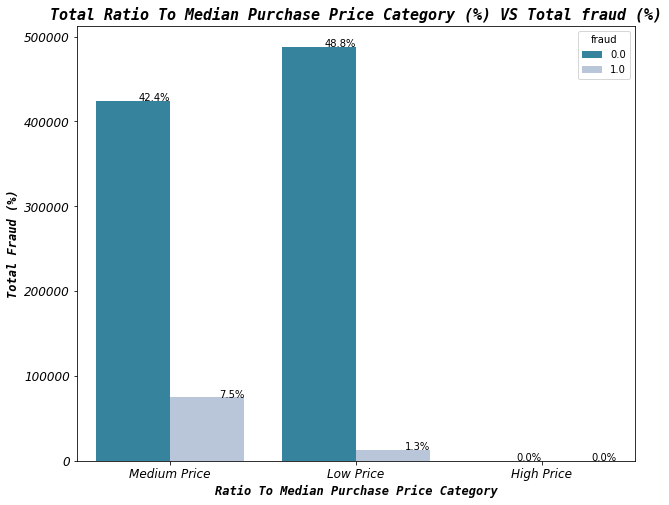

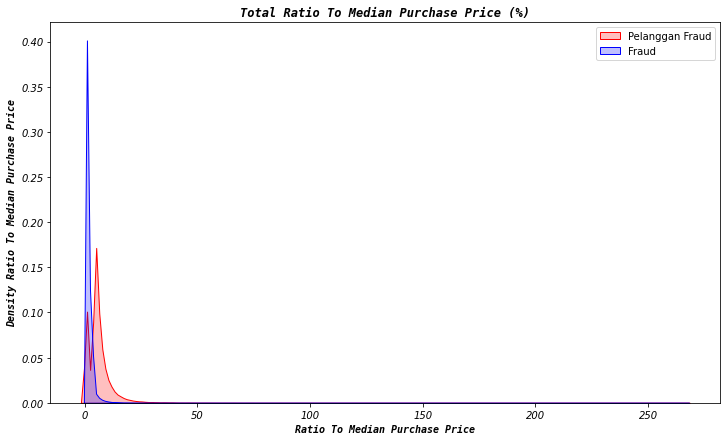

In [162]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='ratio_to_median_purchase_price_category', data=df, hue="fraud", palette = 'PuBuGn_r')
plt.xticks(size=12,fontstyle='italic')
plt.yticks(size=12,fontstyle='italic')
plt.title('Total Online Order VS Total fraud', size=15,fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Online Order', size=12, fontstyle='italic', family='monospace',weight=900)
plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
for container in ax.containers:
    ax.bar_label(container,size=10, horizontalalignment='left')
plt.show()

plt.figure(figsize=(10,8))
ax = sns.countplot(x="ratio_to_median_purchase_price_category", hue="fraud", data=df,palette = 'PuBuGn_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
    plt.xticks(size=12,fontstyle='italic')
    plt.yticks(size=12,fontstyle='italic')
    plt.title('Total Ratio To Median Purchase Price Category (%) VS Total fraud (%)', size=15,fontstyle='italic',family='monospace', weight=900)
    plt.xlabel('Ratio To Median Purchase Price Category', size=12, fontstyle='italic', family='monospace',weight=900)
    plt.ylabel('Total Fraud (%)', size=12, fontstyle='italic',family='monospace', weight=900)
plt.show()

plt.figure(figsize=(12,7))
df_yes=df[df['fraud']==1]['ratio_to_median_purchase_price'] 
df_no=df[df['fraud']==0]['ratio_to_median_purchase_price'] 
sns.kdeplot(df_yes, label = 'Pelanggan Fraud', shade = True, color = 'r',fill=True)
sns.kdeplot(df_no, label = 'Fraud', shade = True, color = 'b', fill=True)
plt.legend()
plt.xticks(size=10,fontstyle='italic')
plt.yticks(size=10,fontstyle='italic')
plt.title('Total Ratio To Median Purchase Price (%)',fontstyle='italic',family='monospace', weight=900)
plt.xlabel('Ratio To Median Purchase Price', fontstyle='italic', size=10, family='monospace',weight=900)
plt.ylabel('Density Ratio To Median Purchase Price', size=10, fontstyle='italic',family='monospace', weight=900)
plt.show()

- Insight :
  - Kasus kecurangan paling banyak terjadi dari pembelian yang kurang dari 20 USD , sedangkan pembelian diatas 20 USD cenderung menurun kasus kecurangan dengan kartu kredit.

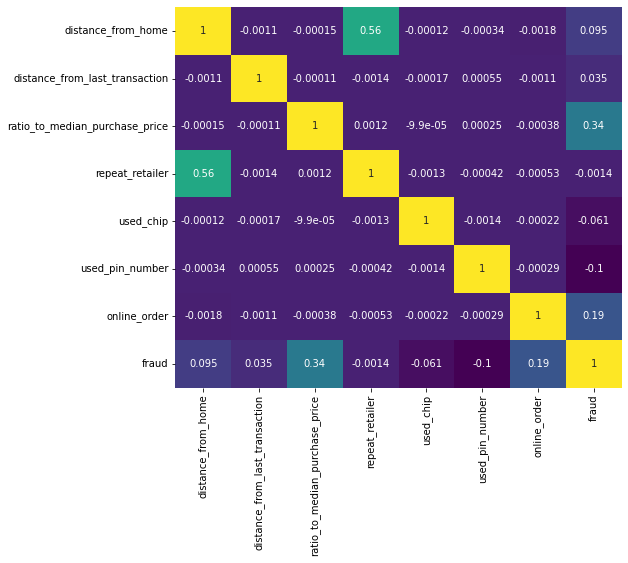

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr('spearman'), cmap='viridis', cbar=False, annot=True)
plt.show()

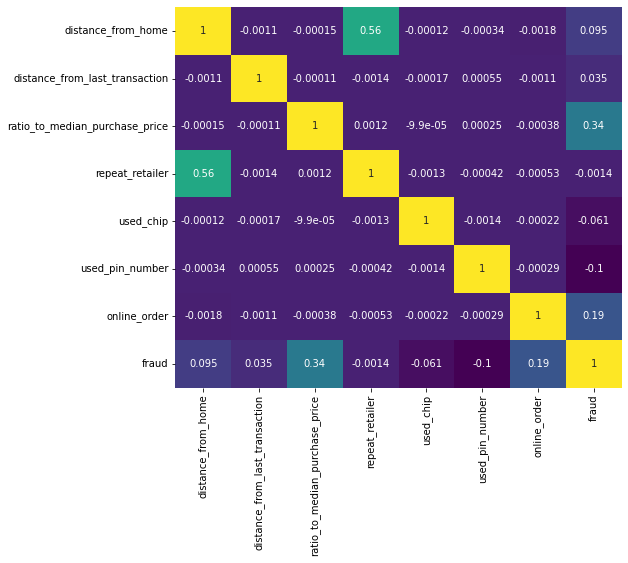

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr('spearman'), cmap='viridis', cbar=False, annot=True)
plt.show()

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,distance_from_home_category,ratio_to_median_purchase_price_category
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0,Far From Home,Medium Price
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0,Near Home,Medium Price
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0,Near Home,Low Price
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0,Near Home,Low Price
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0,Far From Home,Medium Price


In [ ]:
df.drop(columns=['distance_from_home_category','ratio_to_median_purchase_price_category','repeat_retailer','used_chip'],inplace=True)

### **MACHINE LEARNING WITH**

#### **MACHINE LEARNING WITH OUTLIER**

##### **FEATURE ENGINEERING**

In [ ]:
scaler = MinMaxScaler()
fraud = df['fraud']
used_pin_number = df['used_pin_number']
online_order = df['online_order']
df.drop(columns='fraud',inplace=True)
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df['used_pin_number'] = used_pin_number
df['online_order'] = online_order
df['fraud'] = fraud
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
0,0.005443,0.000026,0.007250,0.0,0.0,0.0
1,0.001018,0.000015,0.004816,0.0,0.0,0.0
2,0.000478,0.000068,0.001581,0.0,1.0,0.0
3,0.000211,0.000473,0.001338,0.0,1.0,0.0
4,0.004156,0.000048,0.008284,0.0,1.0,0.0


In [ ]:
df.drop(columns='distance_from_last_transaction',inplace=True)

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['used_pin_number','online_order']),
], remainder='passthrough')

In [ ]:
X = df.drop('fraud',axis=1)
y = df['fraud']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [ ]:
cek_hasil_tranformer = pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names())
cek_hasil_tranformer.head()

,onehot__x0_1.0,onehot__x1_1.0,distance_from_home,ratio_to_median_purchase_price
0,0.0,1.0,0.000322,0.000762
1,0.0,1.0,0.001420,0.010116
2,0.0,1.0,0.002990,0.001121
3,0.0,0.0,0.000960,0.001254
4,0.0,0.0,0.007693,0.004778


- Penggunaan Feature Engineering untuk kolom `distance from home` **,** `distance from last transaction` **,** ` retio to median purchase price`, dalam feature engineering ini menggunakan scaling untuk mengecilkan angka standar deviasi agar tidak menyebabkan bias terlalu besar saat di machine learning.

#### **MODELING MACHINE LEARNING**

##### **BASE MODEL MACHINE LEARNING**

In [ ]:
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier()
model_xgb=XGBClassifier()

In [ ]:
model_machine_learning = [model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train = []
score_recall_mean_ml_train = []
score_precision_mean_ml_train = []
score_f1_mean_ml_train = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',transformer),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train =  cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train.append(model_crossval_acc_train.mean())
    score_recall_mean_ml_train.append(model_crossval_recall_train.mean())
    score_precision_mean_ml_train.append(model_crossval_precision_train.mean())
    score_f1_mean_ml_train.append(model_crossval_f1_train.mean())
    
    print(model_crossval_acc_train, i)
    print(model_crossval_precision_train, i)
    print(model_crossval_recall_train, i)
    print(model_crossval_f1_train, i)

[0.9745125 0.9743425] DecisionTreeClassifier()
[0.85301164 0.85412839] DecisionTreeClassifier()
[0.85606819 0.84991848] DecisionTreeClassifier()
[0.85464253 0.85242846] DecisionTreeClassifier()
[0.9815  0.98121] RandomForestClassifier()
[0.90330975 0.90624076] RandomForestClassifier()
[0.88284088 0.87760648] RandomForestClassifier()
[0.89284011 0.89091385] RandomForestClassifier()
[0.98314   0.9830475] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimat

In [ ]:
score_training = pd.DataFrame({ 'Model': ['Training Model Outlier DecisionTree Regressor', 'Training Model Outlier RandomForest Regressor', 'Training Model Outlier XGBoost Regressor'],
    'Score Outlier Accuracy': score_accuracy_mean_ml_train,
    'Score Outlier Precision': score_recall_mean_ml_train,
    'Score Outlier Recall': score_precision_mean_ml_train,
    'Score Outlier F1': score_f1_mean_ml_train })
print('Score Training :')
score_training

Score Training :


,Model,Score Outlier Accuracy,Score Outlier Precision,Score Outlier Recall,Score Outlier F1
0,Training Model Outlier DecisionTree Regressor,0.974428,0.852993,0.853570,0.853535
1,Training Model Outlier RandomForest Regressor,0.981355,0.880224,0.904775,0.891877
2,Training Model Outlier XGBoost Regressor,0.983094,0.922113,0.888654,0.905072


In [ ]:
model_machine_learning = [model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test = []
score_recall_mean_ml_test = []
score_precision_mean_ml_test = []
score_f1_mean_ml_test = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',transformer),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test =  cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test.append(model_crossval_acc_test.mean())
    score_recall_mean_ml_test.append(model_crossval_recall_test.mean())
    score_precision_mean_ml_test.append(model_crossval_precision_test.mean())
    score_f1_mean_ml_test.append(model_crossval_f1_test.mean())
    
    print(model_crossval_acc_test, i)
    print(model_crossval_precision_test, i)
    print(model_crossval_recall_test, i)
    print(model_crossval_f1_test, i)

[0.97455 0.97544] DecisionTreeClassifier()
[0.85069051 0.86247544] DecisionTreeClassifier()
[0.86018307 0.85367807] DecisionTreeClassifier()
[0.85506174 0.85710996] DecisionTreeClassifier()
[0.98172 0.98169] RandomForestClassifier()
[0.9015381  0.90891908] RandomForestClassifier()
[0.88695652 0.87919002] RandomForestClassifier()
[0.89302433 0.8935527 ] RandomForestClassifier()
[0.98279 0.98309] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100,

In [ ]:
score_testing = pd.DataFrame({ 'Model': ['Testing Model Outlier DecisionTree Regressor', 'Testing Model Outlier RandomForest Regressor', 'Testing Model Outlier XGBoost Regressor'],
    'Score Outlier Accuracy': score_accuracy_mean_ml_test,
    'Score Outlier Precision': score_recall_mean_ml_test,
    'Score Outlier Recall': score_precision_mean_ml_test,
    'Score Outlier F1': score_f1_mean_ml_test})
print('Score Testing :')
score_testing

Score Testing :


,Model,Score Outlier Accuracy,Score Outlier Precision,Score Outlier Recall,Score Outlier F1
0,Testing Model Outlier DecisionTree Regressor,0.974995,0.856931,0.856583,0.856086
1,Testing Model Outlier RandomForest Regressor,0.981705,0.883073,0.905229,0.893289
2,Testing Model Outlier XGBoost Regressor,0.982940,0.905898,0.899642,0.902749


In [ ]:
score_train_test_ol = pd.DataFrame({ 'Model': ['Model Outlier DecisionTree Regressor', 'Model Outlier RandomForest Regressor', 'Model Outlier XGBoost Regressor'],
    'Score F1 Outlier Train': score_f1_mean_ml_train,
    'Score F1 Outlier Test': score_f1_mean_ml_test})
print('Score Training VS Score Testing:')
score_train_test_ol

Score Training VS Score Testing:


,Model,Score F1 Outlier Train,Score F1 Outlier Test
0,Model Outlier DecisionTree Regressor,0.853535,0.856086
1,Model Outlier RandomForest Regressor,0.891877,0.893289
2,Model Outlier XGBoost Regressor,0.905072,0.902749


- Data yang dilakukan prediksi merupakan data imbalance, pada tahapan ini dilakukan prediksi terhadap data imbalance tidak menggunakan Random Sampling / Smote untuk menghandle nya, dan disini dapat dilihat score f1 train dan test yang tertinggi ada pada algoritma XGBoost.

##### **MACHINE LEARNING WITH OVERSAMPLING**

In [ ]:
model_machine_learning = [model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train_os = []
score_recall_mean_ml_train_os = []
score_precision_mean_ml_train_os = []
score_f1_mean_ml_train_os = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',RandomOverSampler()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_os = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train_os = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train_os = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train_os = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train_os.append(model_crossval_acc_train_os.mean())
    score_recall_mean_ml_train_os.append(model_crossval_recall_train_os.mean())
    score_precision_mean_ml_train_os.append(model_crossval_precision_train_os.mean())
    score_f1_mean_ml_train_os.append(model_crossval_f1_train_os.mean())
    
    print(model_crossval_acc_train_os, i)
    print(model_crossval_precision_train_os, i)
    print(model_crossval_recall_train_os, i)
    print(model_crossval_f1_train_os, i)

[0.9744975 0.9742775] DecisionTreeClassifier()
[0.85222799 0.85737785] DecisionTreeClassifier()
[0.85243557 0.84634307] DecisionTreeClassifier()
[0.85391618 0.85175644] DecisionTreeClassifier()
[0.981355 0.98144 ] RandomForestClassifier()
[0.8844961  0.88976178] RandomForestClassifier()
[0.90523726 0.90054632] RandomForestClassifier()
[0.8949959 0.8949246] RandomForestClassifier()
[0.9832525 0.983335 ] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimat

In [ ]:
score_training_non_ol_os = pd.DataFrame({ 'Model': ['Training Model DecisionTree Regressor Outlier OS', 'Training Model RandomForest Regressor Outlier OS', 'Training Model XGBoost Regressor Outlier OS'],
    'Score Accuracy Outlier OS': score_accuracy_mean_ml_train_os,
    'Score Precision Outlier OS': score_recall_mean_ml_train_os,
    'Score Recall Outlier OS': score_precision_mean_ml_train_os,
    'Score F1 Outlier OS': score_f1_mean_ml_train_os})
print('Score Training Outlier OS:')
score_training_non_ol_os

Score Training Outlier OS:


,Model,Score Accuracy Outlier OS,Score Precision Outlier OS,Score Recall Outlier OS,Score F1 Outlier OS
0,Training Model DecisionTree Regressor Outlier OS,0.974387,0.849389,0.854803,0.852836
1,Training Model RandomForest Regressor Outlier OS,0.981397,0.902892,0.887129,0.894960
2,Training Model XGBoost Regressor Outlier OS,0.983294,0.933526,0.882474,0.906978


In [ ]:
model_machine_learning = [model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test_os = []
score_recall_mean_ml_test_os = []
score_precision_mean_ml_test_os = []
score_f1_mean_ml_test_os = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',RandomOverSampler()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_os = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test_os = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test_os = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test_os = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test_os.append(model_crossval_acc_test_os.mean())
    score_recall_mean_ml_test_os.append(model_crossval_recall_test_os.mean())
    score_precision_mean_ml_test_os.append(model_crossval_precision_test_os.mean())
    score_f1_mean_ml_test_os.append(model_crossval_f1_test_os.mean())
    
    print(model_crossval_acc_test_os, i)
    print(model_crossval_precision_test_os, i)
    print(model_crossval_recall_test_os, i)
    print(model_crossval_f1_test_os, i)

[0.97467 0.9756 ] DecisionTreeClassifier()
[0.85261131 0.86682108] DecisionTreeClassifier()
[0.85846682 0.85310605] DecisionTreeClassifier()
[0.8581532 0.859547 ] DecisionTreeClassifier()
[0.98115 0.98189] RandomForestClassifier()
[0.88362985 0.89089473] RandomForestClassifier()
[0.90446224 0.90447317] RandomForestClassifier()
[0.8946475  0.89726844] RandomForestClassifier()
[0.9834  0.98363] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n

In [ ]:
score_testing_non_ol_os = pd.DataFrame({ 'Model': ['Testing Model DecisionTree Regressor Outlier OS', 'Testing Model RandomForest Regressor Outlier OS', 'Testing Model XGBoost Regressor Outlier OS'],
    'Score Accuracy Outlier OS': score_accuracy_mean_ml_test_os,
    'Score Precision Outlier OS': score_recall_mean_ml_test_os,
    'Score Recall Outlier OS': score_precision_mean_ml_test_os,
    'Score F1 Outlier OS': score_f1_mean_ml_test_os})
print('Score Testing Outlier OS:')
score_testing_non_ol_os

Score Testing Outlier OS:


,Model,Score Accuracy Outlier OS,Score Precision Outlier OS,Score Recall Outlier OS,Score F1 Outlier OS
0,Testing Model DecisionTree Regressor Outlier OS,0.975135,0.855786,0.859716,0.858850
1,Testing Model RandomForest Regressor Outlier OS,0.981520,0.904468,0.887262,0.895958
2,Testing Model XGBoost Regressor Outlier OS,0.983515,0.934786,0.882231,0.907815


##### **MACHINE LEARNING WITH SMOTE**

In [ ]:
model_machine_learning = [model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_train_s = []
score_recall_mean_ml_train_s = []
score_precision_mean_ml_train_s = []
score_f1_mean_ml_train_s = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_train_s = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_train_s = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='recall')
    model_crossval_precision_train_s = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='precision')
    model_crossval_f1_train_s = cross_val_score(estimator,X_train,y_train,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_train_s.append(model_crossval_acc_train_s.mean())
    score_recall_mean_ml_train_s.append(model_crossval_recall_train_s.mean())
    score_precision_mean_ml_train_s.append(model_crossval_precision_train_s.mean())
    score_f1_mean_ml_train_s.append(model_crossval_f1_train_s.mean())
    
    print(model_crossval_acc_train_s, i)
    print(model_crossval_precision_train_s, i)
    print(model_crossval_recall_train_s, i)
    print(model_crossval_f1_train_s, i)

[0.94517   0.9454775] DecisionTreeClassifier()
[0.63072964 0.63479804] DecisionTreeClassifier()
[0.90406453 0.902949  ] DecisionTreeClassifier()
[0.74168151 0.74540894] DecisionTreeClassifier()
[0.9721025 0.9716825] RandomForestClassifier()
[0.78680952 0.79419964] RandomForestClassifier()
[0.93078001 0.92832013] RandomForestClassifier()
[0.85727461 0.85458731] RandomForestClassifier()
[0.983115  0.9831325] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_est

In [ ]:
score_training_non_ol_smote = pd.DataFrame({ 'Model': ['Training Model DecisionTree Regressor Outlier Smote', 'Training Model RandomForest Regressor Outlier Smote', 'Training Model XGBoost Regressor Outlier Smote'],
    'Score Accuracy Outlier Smote': score_accuracy_mean_ml_train_s,
    'Score Precision Non Outlier Smote': score_recall_mean_ml_train_s,
    'Score Recall Non Outlier Smote': score_precision_mean_ml_train_s,
    'Score F1 Non Outlier Smote': score_f1_mean_ml_train_s})
print('Score Training Outlier Smote:')
score_training_non_ol_smote

Score Training Outlier Smote:


,Model,Score Accuracy Outlier Smote,Score Precision Non Outlier Smote,Score Recall Non Outlier Smote,Score F1 Non Outlier Smote
0,Training Model DecisionTree Regressor Outlier ...,0.945324,0.903507,0.632764,0.743545
1,Training Model RandomForest Regressor Outlier ...,0.971893,0.929550,0.790505,0.855931
2,Training Model XGBoost Regressor Outlier Smote,0.983124,0.933512,0.880380,0.906656


In [ ]:
model_machine_learning = [model_dt, model_rf, model_xgb]

score_accuracy_mean_ml_test_s = []
score_recall_mean_ml_test_s = []
score_precision_mean_ml_test_s = []
score_f1_mean_ml_test_s = []

for i in model_machine_learning:
    croval_classification = StratifiedKFold(n_splits=2)
    estimator = Pipeline([
        ('Processor',transformer),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])
    
    model_crossval_acc_test_s = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='accuracy')
    model_crossval_recall_test_s = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='recall')
    model_crossval_precision_test_s = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='precision')
    model_crossval_f1_test_s = cross_val_score(estimator,X_test,y_test,cv=croval_classification,scoring='f1')
    
    score_accuracy_mean_ml_test_s.append(model_crossval_acc_test_s.mean())
    score_recall_mean_ml_test_s.append(model_crossval_recall_test_s.mean())
    score_precision_mean_ml_test_s.append(model_crossval_precision_test_s.mean())
    score_f1_mean_ml_test_s.append(model_crossval_f1_test_s.mean())
    
    print(model_crossval_acc_test_s, i)
    print(model_crossval_precision_test_s, i)
    print(model_crossval_recall_test_s, i)
    print(model_crossval_f1_test_s, i)

[0.94671 0.94909] DecisionTreeClassifier()
[0.63468783 0.64029887] DecisionTreeClassifier()
[0.90480549 0.90092667] DecisionTreeClassifier()
[0.74561775 0.75604248] DecisionTreeClassifier()
[0.97063 0.97149] RandomForestClassifier()
[0.77573564 0.78333012] RandomForestClassifier()
[0.93146453 0.92861229] RandomForestClassifier()
[0.85071745 0.85082122] RandomForestClassifier()
[0.98156 0.9823 ] XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100,

##### PERBANDINGAN MODELING MACHINE LEARNING

In [ ]:
score_train_test_ol_os_smote = pd.DataFrame({ 'Model': ['Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Train': score_f1_mean_ml_train,
    'Score F1 Test': score_f1_mean_ml_test,
    'Score F1 Train Outlier OS': score_f1_mean_ml_train_os,
    'Score F1 Test Outlier OS': score_f1_mean_ml_test_os,
    'Score F1 Train Outlier Smote':score_f1_mean_ml_train_s,
    'Score F1 Test Outlier Smote': score_f1_mean_ml_test_s})
print('Score Training VS Score Testing:')
score_train_test_ol_os_smote

Score Training VS Score Testing:


,Model,Score F1 Train,Score F1 Test,Score F1 Train Outlier OS,Score F1 Test Outlier OS,Score F1 Train Outlier Smote,Score F1 Test Outlier Smote
0,Model DecisionTree Regressor,0.853535,0.856086,0.852836,0.858850,0.743545,0.750830
1,Model RandomForest Regressor,0.891877,0.893289,0.894960,0.895958,0.855931,0.850769
2,Model XGBoost Regressor,0.905072,0.902749,0.906978,0.907815,0.906656,0.901018


In [ ]:
score_test_ol_os_smote = pd.DataFrame({ 'Model': ['Model DecisionTree Regressor', 'Model RandomForest Regressor', 'Model XGBoost Regressor'],
    'Score F1 Test': score_f1_mean_ml_test,
    'Score F1 Test Outlier OS': score_f1_mean_ml_test_os,
    'Score F1 Test Outlier Smote': score_f1_mean_ml_test_s})
print('Score Testing:')
score_test_ol_os_smote.round(2)

Score Testing:


,Model,Score F1 Test,Score F1 Test Outlier OS,Score F1 Test Outlier Smote
0,Model DecisionTree Regressor,0.86,0.86,0.75
1,Model RandomForest Regressor,0.89,0.90,0.85
2,Model XGBoost Regressor,0.90,0.91,0.90


Dari hasil F1 score, model yang memiliki skor f1 yang tinggi ada pada `Model XGBoost Regressor dengan skor F1 Over Sampling 91%`, yang artinya ketika perangkat ini digunakan maka akan berhasil menebak tindakan - tindakan yang masuk dalam kecurangan yang terjadi sebesar 91% ke akuratannya. Dan model ini akan dijadikan base model dan tidak lakukan tuning untuk peningkatan skor nya karena sudah memilik skor akurat yang tinggi.

In [ ]:
model_xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### **Benchmarking Base Model**

In [ ]:
estimator_xgb_os = Pipeline([
        ('Processor',transformer),
        ('balancing',SMOTE()),
        ('Model_Machine_Learning',i)])

estimator_xgb_os.fit(X_train, y_train)

Pipeline(steps=[('Processor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['used_pin_number',
                                                   'online_order'])])),
                ('balancing', SMOTE()),
                ('Model_Machine_Learning',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [ ]:
y_pred_default = estimator_xgb_os.predict(X_test)
report_default = classification_report(y_test, y_pred_default)

In [ ]:
print('Classification Report Default XGB : \n', report_default)

Classification Report Default XGB : 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182519
         1.0       0.89      0.94      0.91     17481

    accuracy                           0.98    200000
   macro avg       0.94      0.96      0.95    200000
weighted avg       0.98      0.98      0.98    200000



In [ ]:
print('Confusion Matrix Base XGBoost with RandomOverSampling :')
cm_base_ts = confusion_matrix(y_test, y_pred_default, labels=[1,0])
df_base_ts = pd.DataFrame(data = cm_base_ts, columns=['Pred 1', 'Pred 0'], index=['Act 1', 'Act 0'])
df_base_ts

Confusion Matrix Base XGBoost with RandomOverSampling :


,Pred 1,Pred 0
Act 1,16354,1127
Act 0,2084,180435


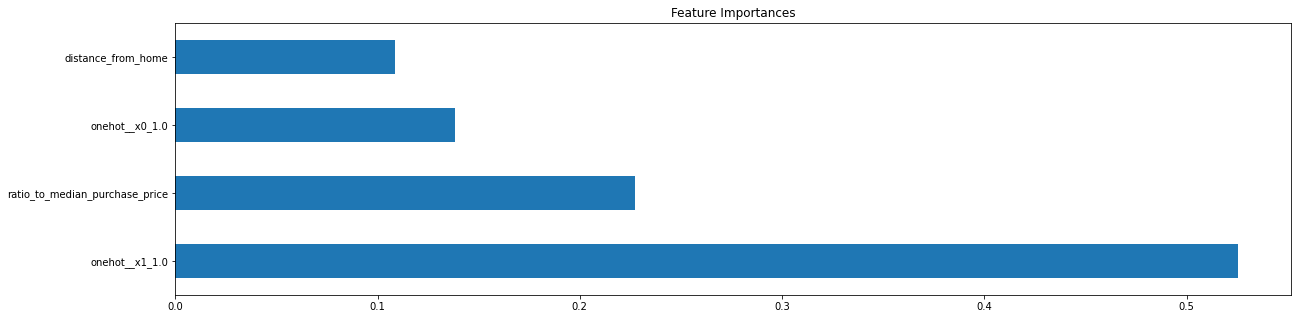

In [ ]:
coef1 = pd.Series(estimator_xgb_os['Model_Machine_Learning'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
coef1.plot(kind='barh', figsize=(20,5),title='Feature Importances')
plt.show()

#### **Kesimpulan**

1.	Transaksi kecurangan terjadi sebanyak 8,7%, yang mana lokasi terbanyak terjadi berada kurang dari  27mil dari jarak rumah, hal ini terjadi pada transaksi pada toko yang pernah kostumer kunjungi untuk berbelanja secara online dan transaksi kecurangan pada kartu kredit ini terjadi pada kartu kredit yang tidak memiliki pin keamanan tambahan dan kartu kredit yang tidak menggunakan chip dan untuk kecurangan ini paling banyak pada harga kurang dari 20USD atau masuk dalam kategori transaksi dengan harga yang sedang.
2.	Dari kasus ini hal yang paling memiliki pengaruh ada pada harga pembelian dengan total persentase pengaruh nya 5%.
3.	Model Machine Learning ini menggunakan algoritma XGBoost dan hasil dari prediksi machine learning ini mampu menebak transaksi yang teridentifikasi tidak melakukan kecurangan sebanyak 99%, dan transaksi yang dianggap memiliki resiko kecurangan sebanyak 89%, transaksi yang sama sekali tidak termasuk dalam kecurangan sebanyak 99% dan rata-rata keberhasilan menebak ada pada angka 94% keakuratannya serta model machine learning ini secara keseluruhan memiliki persentase keakuratan secara keseluruhan sebanyak 91%.


#### **Saran**

- Pihak perbankan dapat meningkatkan standar keamanan pada penggunaan kartu kredit terutama pada kartu kredit yang belum menggunakan kartu yang memiliki chip dan yang belum memiliki tambahan pin saat penggunaan kartu kredit.
- Jika model machine learning ini di implementasikan maka tingkat keamanan untuk mendeteksi kecurangan penggunaan kartu kredit akan menurun namun pihak perbankan tetap harus memberikan notifikasi / konfirmasi tambahan kepada konsumen setiap transaksi yang dilakukan. Hal ini dilakukan untuk mengefisienkan penggunaan machine learning ketika melakukan pendeteksian kecurangan kartu kredit, Karena jika hal ini tidak di implementasikan jika transaksi yang dilakukan customer terutama untuk harga pembeliannya diatas rata-rata transaksi yang biasanya maka machine akan mendeteksi telah terjadi kecurangan dan customer akan mendapatkan notifikasi telah terjadi kecurangan. Sehingga untuk meng efisienkan dan meng efektifkan penggunaan nya perlu dilakukan kerja sama antara perbankan dengan customer seperti menambah fitur konfirmasi tambahan untuk setiap transaksi yang menyatakan bahwa transaksi tersebut dilakukan oleh customer dan konfirmasi ini dilakukan melalui aplikasi perbankan yang ada di mobil customer serta jika customer tidak melakukan transaksi maka perbankan tidak dapat meneruskan transaksi tersebut hal ini untuk menghindari dan mengecilkan transaksi yang curang pada kartu kredit customer.